<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Practice Loading and Describing Data 

_Authors: Matt Brems (DC)_

---

In this lab you will practice loading data using python and describing it with statistics.

It might be a good idea to first check the [source of the Boston housing data](https://archive.ics.uci.edu/ml/datasets/Housing).

### 1. Load the boston housing data (provided)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for your convenience. You may choose to edit the names, should you decide it would be more helpful to do so.

In [35]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

### 2. Load the `housing.data` file with python

Using any method of your choice.

> _**Hint:** despite this file having a strange `.data` extension, using python's `open() as file` and `file.read()` or `file.readlines()` we can load this in and see that it is a text file formatted much the same as a CSV. You can use string operations to format the data._

In [37]:
# A:
import pandas as pd
housing_df = pd.read_csv(r'C:\Users\Daniel_Heffley\Desktop\jan 12 2020\DAT-course-materials-students-master\homework\housing.csv')

In [38]:
housing_df.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### 3.  Conduct a brief integrity check of your data. 

This integrity check should include, but is not limited to, checking for missing values and making sure all values make logical sense. (i.e. is one variable a percentage, but there are observations above 100%?)

Summarize your findings in a few sentences, including what you checked and, if appropriate, any 
steps you took to rectify potential integrity issues.

In [40]:
# A:
housing_df.shape

(506, 14)

In [43]:
housing_df.isna().sum()

CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV       54
dtype: int64

In [45]:
housing_df['INDUS'].value_counts()

18.10    78
0.00     54
19.58    30
8.14     22
6.20     18
21.89    15
9.90     12
3.97     12
8.56     11
10.59    11
5.86     10
10.01     9
6.91      9
7.38      8
2.46      8
5.19      8
9.69      8
7.87      7
25.65     7
2.18      7
4.05      7
5.13      6
3.44      6
12.83     6
4.93      6
11.93     5
6.96      5
27.74     5
2.89      5
6.41      5
         ..
2.03      2
1.91      2
2.93      2
6.06      2
7.07      2
1.47      2
3.37      2
1.69      2
2.95      2
1.25      2
3.64      2
3.78      2
2.68      2
4.39      2
2.25      1
3.75      1
1.38      1
1.89      1
1.22      1
2.97      1
1.32      1
0.74      1
1.76      1
2.31      1
0.46      1
1.21      1
4.15      1
2.02      1
2.01      1
4.00      1
Name: INDUS, Length: 77, dtype: int64

In [46]:
housing_df['ZN'].value_counts()

0.0      318
18.1      54
20.0      21
80.0      15
12.5      10
25.0      10
22.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
60.0       4
95.0       4
33.0       4
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
75.0       3
34.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

In [47]:
housing_df['LSTAT'].value_counts()

7.20     4
7.79     3
10.20    3
8.05     3
10.40    3
14.10    3
10.50    3
6.36     3
17.60    2
9.97     2
5.33     2
5.98     2
3.76     2
21.32    2
4.45     2
13.27    2
3.16     2
14.81    2
4.59     2
3.11     2
4.56     2
12.67    2
13.15    2
6.58     2
10.90    2
18.06    2
13.80    2
7.44     2
8.30     2
5.50     2
        ..
9.60     1
27.80    1
19.31    1
13.09    1
6.43     1
4.08     1
12.27    1
4.14     1
14.09    1
4.03     1
9.47     1
11.66    1
11.34    1
11.12    1
19.52    1
7.54     1
6.87     1
10.26    1
6.21     1
5.19     1
10.30    1
14.80    1
6.86     1
12.87    1
4.97     1
13.59    1
13.28    1
3.13     1
13.99    1
3.56     1
Name: LSTAT, Length: 445, dtype: int64

In [ ]:
#I looked at the na value counts and saw that MEDV has some missing values. I could ignore those values for correlation tests
#and fill the missing values with the median value for other metrics. I tested all of the proportion columns and they all seem
#to be out of 100.

### 4. For what two attributes does it make the *least* sense to calculate mean and median? Why?

In [5]:
# A: CHAS is a true or false, so it does not make sense to do it for that. MEDV has missing values as it is and is already Median
#so, I don't think there needs to be a median of medians

### 5. Which two variables have the strongest linear association? 

Report both variables, the metric you chose as the basis for your comparison, and the value of that metric. *(Hint: Make sure you consider only variables for which it makes sense to find a linear association.)*

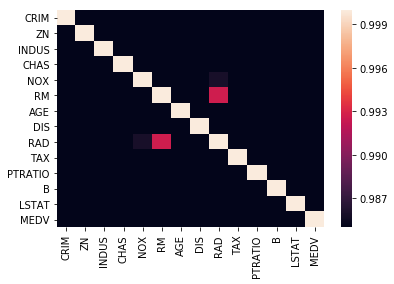

In [62]:
# A:
import seaborn as sns
ax = sns.heatmap(housing_df.corr(), vmin = .985)
#Rad and Rm have the hghest correlation. I chose a linear correlation as the metric. The value of the r-value is around .98

### 6. Look at distributional qualities of variables.

Answer the following questions:
1. Which variable has the most symmetric distribution? 
2. Which variable has the most left-skewed (negatively skewed) distribution? 
3. Which variable has the most right-skewed (positively skewed) distribution? 

Defend your method for determining this.

<IPython.core.display.Javascript object>


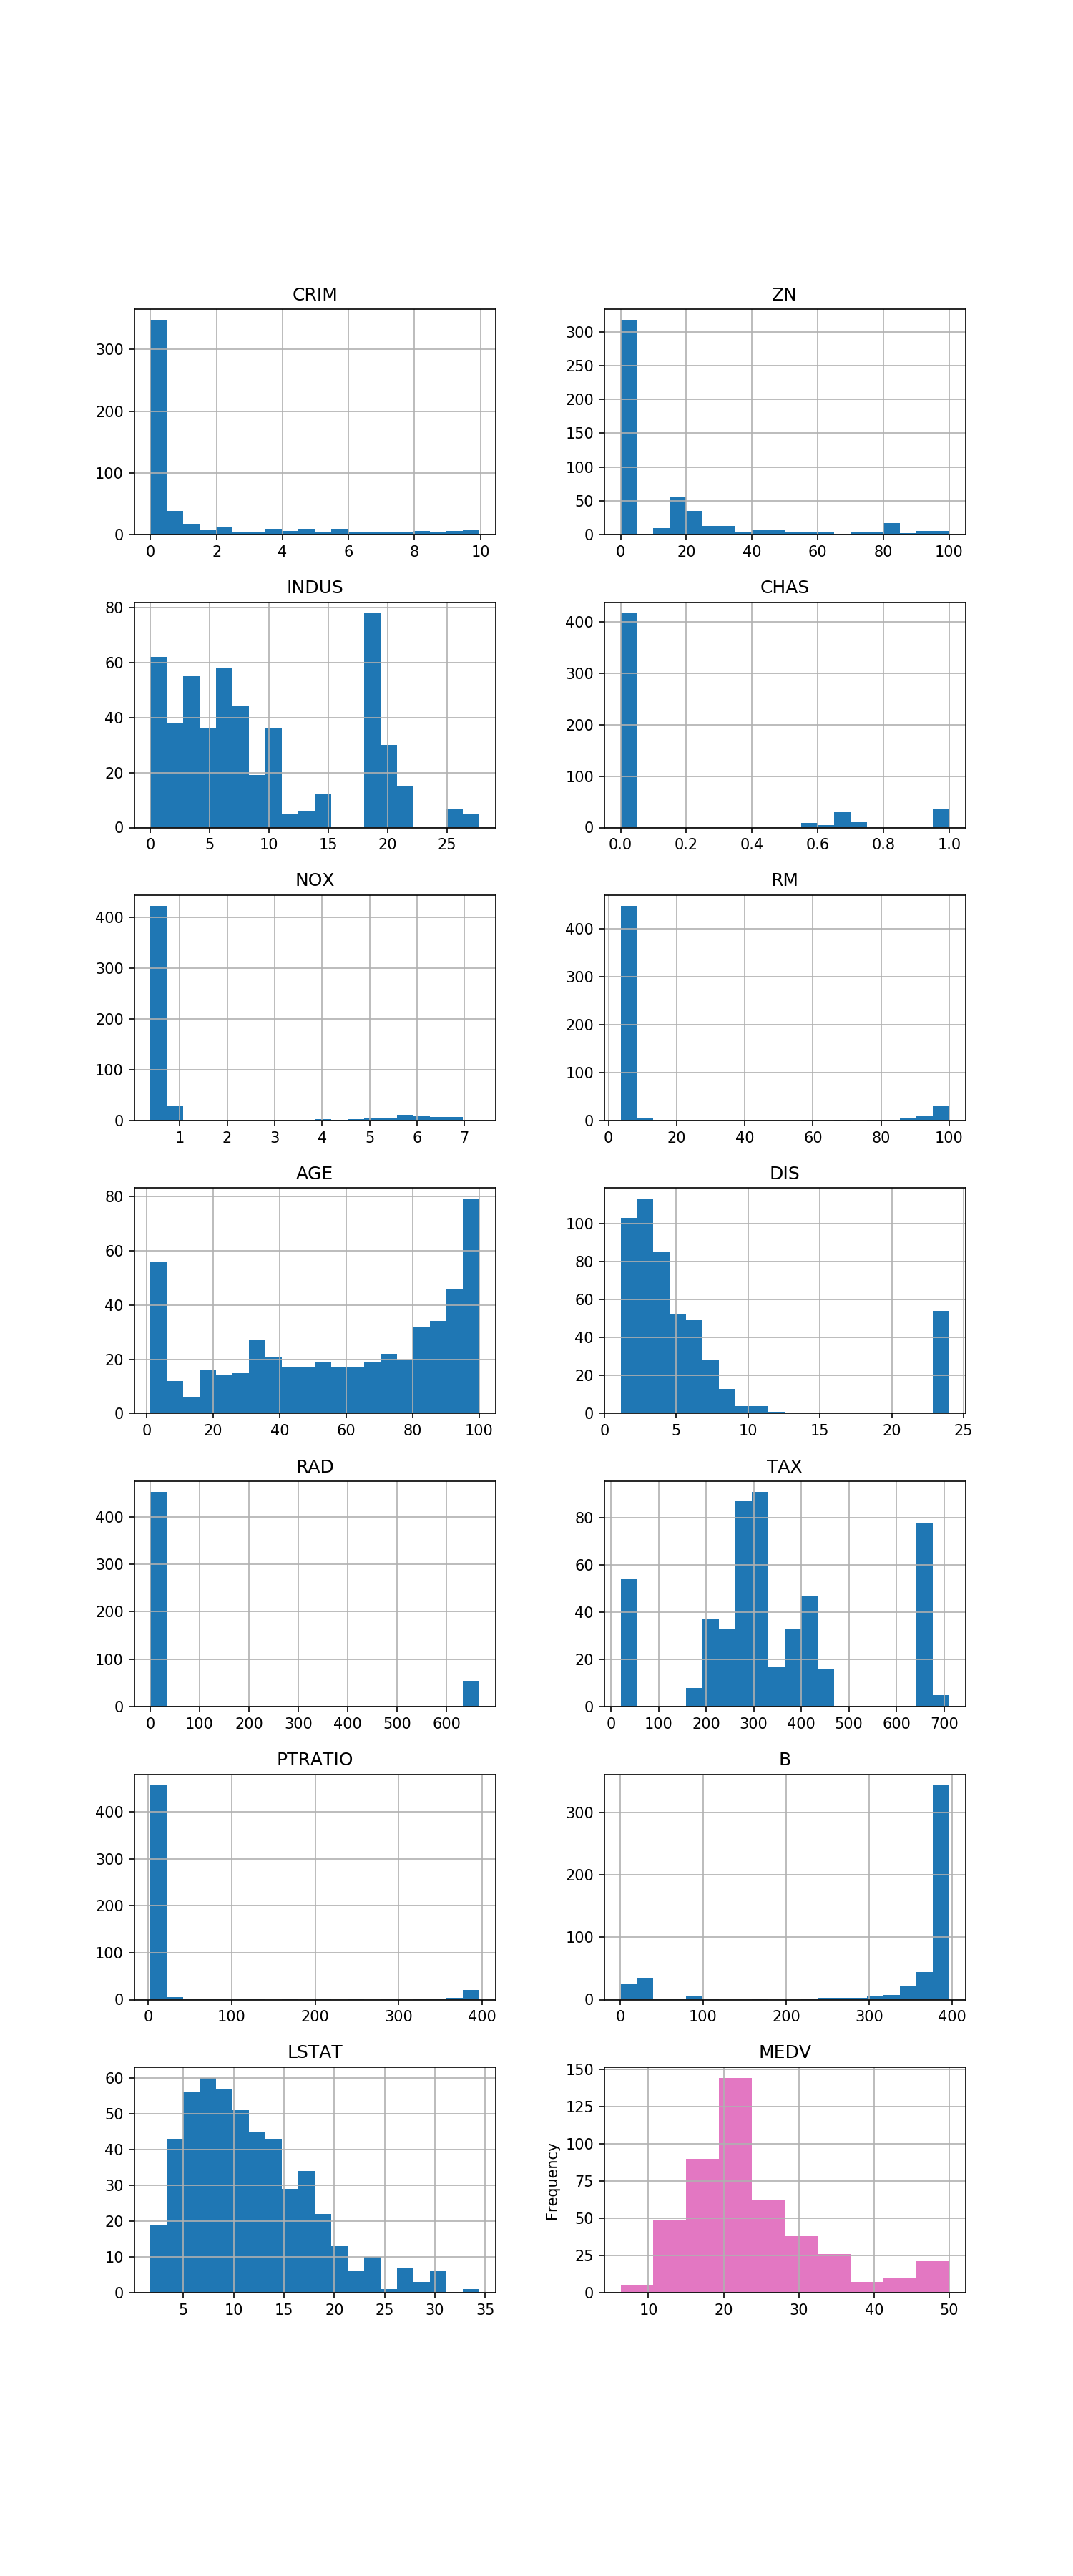

In [67]:
# A:
%matplotlib notebook
from itertools import combinations
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(housing_df.columns)//2, 2, figsize=(10, 24))

i = 0
for triaxis in axes:
    for axis in triaxis:
        housing_df.hist(column = housing_df.columns[i], bins = 20, ax=axis)
        i = i+1
#Tax has the most symetric distribution
#Age is mist left skewed
#Crim is most right skewed.
#I figured this all out by plotting histograms for each variable

### 8. Repeat question 6 but scale the variables by their range first.

As you may have noticed, the spread of the distribution contributed significantly to the results in question 6.

In [8]:
# A:


### 9. Univariate analysis of your choice

Conduct a full univariate analysis on MEDV, CHAS, TAX, and RAD. 

For each variable, you should answer the three questions generally asked in a univariate analysis using the most appropriate metrics.
- A measure of central tendency
- A measure of spread
- A description of the shape of the distribution (plot or metric based)

If you feel there is additional information that is relevant, include it. 

In [75]:
# A:
print(housing_df['MEDV'].median())
print(housing_df['MEDV'].describe())

21.95
count    452.000000
mean      23.750442
std        8.808602
min        6.300000
25%       18.500000
50%       21.950000
75%       26.600000
max       50.000000
Name: MEDV, dtype: float64


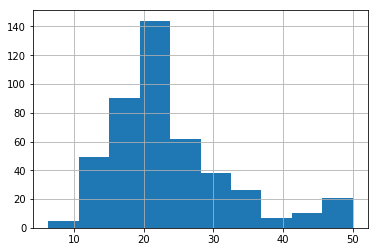

In [82]:
%matplotlib inline
housing_df['MEDV'].hist()

In [83]:
print(housing_df['CHAS'].median())
print(housing_df['CHAS'].describe())

0.0
count    506.000000
mean       0.140765
std        0.312765
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64


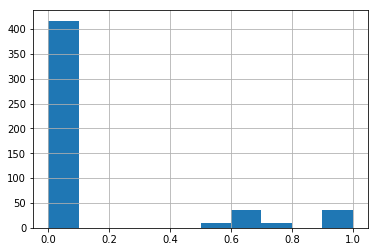

In [84]:
housing_df['CHAS'].hist()# Plot shows non 1 and 0 values. Not ideal for a true false category?

In [86]:
print(housing_df['TAX'].median())
print(housing_df['TAX'].describe())

307.0
count    506.000000
mean     339.317787
std      180.670077
min       20.200000
25%      254.000000
50%      307.000000
75%      403.000000
max      711.000000
Name: TAX, dtype: float64


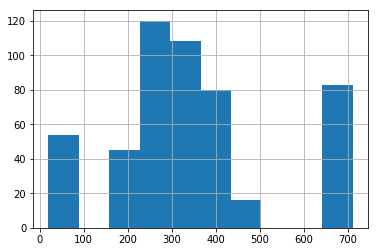

In [87]:
housing_df['TAX'].hist()

In [88]:
print(housing_df['RAD'].median())
print(housing_df['RAD'].describe())

5.0
count    506.000000
mean      78.063241
std      203.542157
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max      666.000000
Name: RAD, dtype: float64


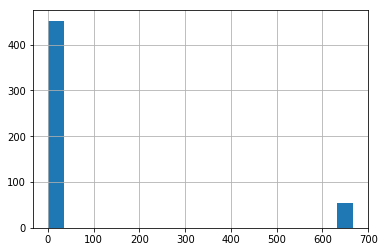

In [90]:
housing_df['RAD'].hist(bins = 20)

### 10. Have you been using inferential statistics, descriptive statistics, or both?

For each exercise, identify the branch of statistics on which you relied for your answer.

In [10]:
# A:We have been using census statistics and making observations about them. We haven't been inferring about the population

### 11. Reducing the number of observations

It seems likely that this data is a census - that is, the data set includes the entire target population. Suppose that the 506 observations was too much for our computer (as unlikely as this might be) and we needed to pare this down to fewer observations. 

**11.A Use the `random.sample()` function to select 50 observations from `'AGE'`.**

([This documentation](https://docs.python.org/2/library/random.html) may be helpful.)

In [92]:
# A:
import random
random.sample(list(housing_df['AGE']), 50)

[23.4,
 21.4,
 84.4,
 67.8,
 1.6475,
 1.4395,
 98.9,
 29.3,
 90.4,
 21.9,
 41.1,
 82.6,
 90.0,
 51.8,
 18.5,
 7.8,
 33.0,
 32.0,
 80.8,
 69.7,
 76.0,
 9.8,
 22.9,
 90.8,
 94.5,
 52.5,
 42.3,
 38.5,
 88.5,
 1.7821,
 1.8347,
 76.5,
 100.0,
 94.5,
 46.7,
 26.3,
 91.3,
 78.3,
 45.7,
 92.6,
 91.8,
 97.9,
 85.1,
 86.9,
 58.5,
 28.9,
 1.8589,
 6.8,
 58.4,
 72.5]

**11.B Identify the type of sampling we just used.**

In [12]:
# A:random sample

### 12. [BONUS] Of the remaining types of sampling, describe (but do not execute) how you might implement at least one of these types of sampling.


In [13]:
# A: